In [1]:
import numpy as np
import scipy.optimize as opt
import time
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, "C:\\Users\\utabo\\Documents\\GitHub\\BootCamp2019\\ProblemSets\\ECON\\Week 4")
import params as p


# Question 1

In [2]:

#==================================================================================#
def get_K(b,p):
    K=sum(b)
    return K
def get_L(n,p):
    L=sum(n)
    return L

def get_r(L,K,p):
    r=p.alpha*p.A*(L/K)**(1-p.alpha)-p.delta
    return r

def get_w(L,K,p):
    w=(1-p.alpha)*p.A*(K/L)**(p.alpha)
    return w

def get_C(n,w,r,b,p):
    c=np.zeros(3)
    c[0]=w*n[0]-b[0]
    c[1]=w*n[1]+(1+r)*b[0]-b[1]
    c[2]=w*n[2]+(1+r)*b[1]
    return c


def margu(c,p):
    marg=c**(-p.sigma)
    return marg

def SS_solve(bvec_guess, nvec,p):
    k=get_K(bvec_guess,p)
    l=get_L(nvec,p)
    r=get_r(l,k,p)
    w=get_w(l,k,p)
    c=get_C(nvec,w,r,bvec_guess,p)
    return k,l,r,w,c



def feasible(p, bvec_guess,nvec):
    K,l,r,w,c=SS_solve(bvec_guess,nvec,p)
    K_cnstr=(K<=0)
    c_cnstr=(c<=0)
    b_cnstr=[c_cnstr[0]==1, c_cnstr[2]==1]
    return b_cnstr, c_cnstr, K_cnstr

nvec=np.array([1.0,1.0,.2])

bvec_guess = np.array([1.0, 1.2])
print(feasible(p, bvec_guess,nvec))
#satisfies consumption, but not capital constraints
bvec_guess = np.array([0.06, -0.001])
print(feasible(p, bvec_guess,nvec))
#first and last cons and capital constraints violated

bvec_guess = np.array([0.1, 0.1])
print(feasible(p, bvec_guess,nvec))
#violates first consumption constraint and capital constraint



([True, False], array([ True, False, False]), False)
([False, False], array([False, False, False]), False)
([False, False], array([False, False, False]), False)


Number 1 violates consumption constraints, number 2 and 3 satisfy all constraints

#  Question 2

([False, False], array([False, False, False]), False)
{'b_ss': array([0.01931253, 0.0584111 ]), 'c_ss': array([0.18241213, 0.20961468, 0.24087387]), 'w_ss': 0.20172465739052575, 'r_ss': 2.433062339127069, 'K_ss': 0.07772362575316386, 'Y_ss': array([0.23227183, 0.25947439, 0.29073357]), 'EulErr_ss': -2.5437429940211587e-12, 'RCerr_ss': 1.2505552149377763e-12, 'ss_time': 0.0015978999999992638}
([False, False], array([False, False, False]), False)
{'b_ss': array([0.01931253, 0.0584111 ]), 'c_ss': array([0.18241213, 0.20961468, 0.24087387]), 'w_ss': 0.20172465739052575, 'r_ss': 2.433062339127069, 'K_ss': 0.07772362575316386, 'Y_ss': array([0.23227183, 0.25947439, 0.29073357]), 'EulErr_ss': -2.5437429940211587e-12, 'RCerr_ss': 1.2505552149377763e-12, 'ss_time': 0.0015978999999992638}


C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Text(0.5, 1.0, 'cons')

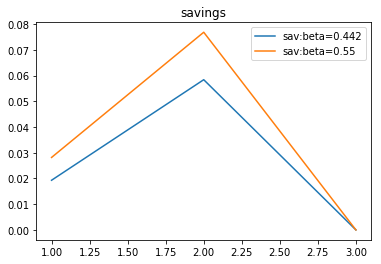

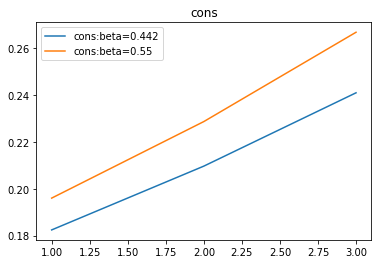

In [3]:
#======================================================================#
#start_time = time.clock() # Place at beginning of get_SS()
def euler(bvec_guess,n,p):
    k=get_K(bvec_guess,p)
    l=get_L(n,p)
    r=get_r(l,k,p)
    w=get_w(l,k,p)
    c=get_C(n,w,r,bvec_guess,p)
    err1=p.beta*(1+r)*margu(c[2],p)-margu(c[1],p)
    err2=p.beta*(1+r)*margu(c[1],p)-margu(c[0],p)
    return err1,err2

def get_SS(bvec_guess, nvec,p):
    start_time = time.clock()
    b_ss= opt.root(euler, bvec_guess,args=(nvec,p), tol = 1e-10)
    l=get_L(nvec,p)
    k_ss=get_K(b_ss.x,p)
    r_ss=get_r(l,k_ss,p)
    w_ss=get_w(l,k_ss,p)
    c_ss=get_C(nvec,w_ss,r_ss,b_ss.x,p)
    Y_ss=c_ss+p.delta*k_ss
    err1,err2=euler(b_ss.x,nvec,p)
    ss_time = time.clock() - start_time
    ss_output = {
    'b_ss': b_ss.x, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': k_ss, 'Y_ss': Y_ss, 'EulErr_ss': err1, 'RCerr_ss': err2,'ss_time': ss_time}
    return ss_output

nvec=np.array([1.0,1.0,.2])
bvec_guess = np.array([0.1, 0.1])
print(feasible(p, bvec_guess,nvec))
ss=get_SS(bvec_guess, nvec,p)
timevec=np.array([1,2,3])
plt.figure(0)
savings_ss=np.append(ss['b_ss'],[0])
plt.figure(0)
plt.plot(timevec, savings_ss,label="sav:beta=0.442")
plt.legend()
plt.figure(1)
plt.plot(timevec, ss['c_ss'],label="cons:beta=0.442")
plt.legend()
K_ss=ss['K_ss']
b_ss=ss['b_ss']
print(ss)

p.beta=0.55
bvec_guess = np.array([0.2,0.2])
print(feasible(p, bvec_guess,nvec))
ss2=get_SS(bvec_guess, nvec,p)
savings_ss=np.append(ss2['b_ss'],[0])
print(ss)
plt.figure(0)
plt.plot(timevec, savings_ss,label="sav:beta=0.55")
plt.legend()
plt.title("savings")
plt.figure(1)
plt.plot(timevec,ss2['c_ss'],label="cons:beta=0.55")
plt.legend()
plt.title("cons")

If individuals become more patient, they save more, hence they also have more resources to consume.



# Question 3

C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


{'b_ss': array([0.01931253, 0.0584111 ]), 'c_ss': array([0.18241213, 0.20961468, 0.24087387]), 'w_ss': 0.20172465739052575, 'r_ss': 2.433062339127069, 'K_ss': 0.07772362575316386, 'Y_ss': array([0.23227183, 0.25947439, 0.29073357]), 'EulErr_ss': -2.5437429940211587e-12, 'RCerr_ss': 1.2505552149377763e-12, 'ss_time': 0.001289900000000621}
CONVERGENCE ACHIEVED


Text(0.5, 1.0, 'wage path')

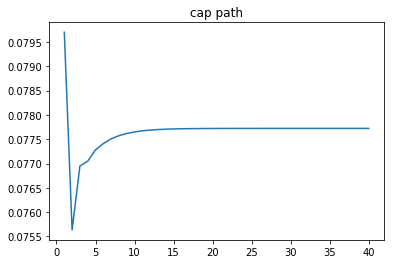

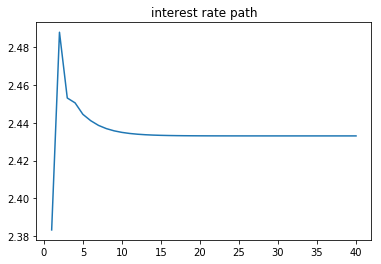

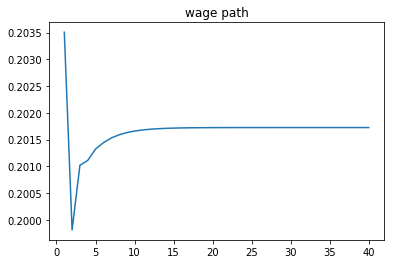

In [4]:

#Time path iteration
def EE2(b3,b2,n,w,r,p):
    c=get_C2(n,w,r,b2,b3,p)
    err2=p.beta*(1+r[1])*margu(c[1],p)-margu(c[0],p)
    return err2


def get_C2(n,w,r,b2,b3,p):
    c=np.zeros(2)
    c[0]=w[0]*n[1]+(1+r[0])*b2-b3
    c[1]=w[1]*n[2]+(1+r[1])*b3
    return c


def get_C3(n,w,r,b,p):
    c=np.zeros(3)
    c[0]=w[0]*n[0]-b[0]
    c[1]=w[1]*n[1]+(1+r[0])*b[0]-b[1]
    c[2]=w[2]*n[2]+(1+r[1])*b[1]
    return c


def EE1(bvec_guess,n,w,r,p):
    c=get_C3(n,w,r,bvec_guess,p)
    err2=margu(c[0],p)-p.beta*(1+r[1])*margu(c[1],p)
    err1=margu(c[1],p)-p.beta*(1+r[2])*margu(c[2],p)
    return err1,err2

def tpi(b_init,Kpath,eps,tguess,bvec_guess,nvec):
    #K=Kpath
    K=np.zeros(tguess)
    K[0]=Kpath[0]
    bo=np.zeros(tguess+2)
    bm=np.zeros(tguess+2)
    b2=b_init[0]
    l=get_L(nvec,p)
    for j in range(0,maxiter):
        Kappend=np.append(Kpath,[Kpath[tguess-1],Kpath[tguess-1]])
        r=get_r(l,Kappend,p)
        w=get_w(l,Kappend,p)
        for t in range(0,tguess-1):
            rt=np.array([r[t],r[t+1],r[t+2]])
            wt=np.array([w[t],w[t+1],w[t+2]])
            res=opt.root(EE2, bvec_guess[0],args=(b2,nvec,wt,rt,p), tol = 1e-10)
            bo[0]=res.x
            b= opt.root(EE1, bvec_guess,args=(nvec,wt,rt,p), tol = 1e-10)
            bm[t]=b.x[0]
            K[t+1]=bo[t]+bm[t]
            bo[t+1]=b.x[1]
        err=np.sqrt(sum((Kpath-K)**2))
        if err>eps:
            Kpath=Kpath*(1-xsi)+K*(xsi)
        else:
            print("CONVERGENCE ACHIEVED")
            break
    return Kpath, err,j,r, w

p.beta=0.442
tguess=40
b_init=np.array([0.8*b_ss[0],1.1*b_ss[1]])
xsi=0.4
eps=10**(-9)

#bvec_guess = np.array([0.1,0.1])
bvec_guess = np.array([0.1,0.1])
maxiter=100
nvec=np.array([1.0,1.0,.2])
print(get_SS(bvec_guess, nvec,p))
K_init=sum(b_init)
Kguess=np.linspace(K_init,K_ss,tguess )
Kout, err,j,rpath,wpath=tpi(b_init,Kguess,eps,tguess,bvec_guess ,nvec)

timeax=np.linspace(1,tguess,num=tguess)
plt.figure(31)
plt.plot(timeax, Kout)
plt.title("cap path")


plt.figure(32)
plt.plot(timeax, rpath[0:tguess])
plt.title("interest rate path")
plt.figure(33)
plt.plot(timeax, wpath[0:tguess])
plt.title("wage path")




In [9]:
time_toSS=(Kout-K_ss)<0.00001
np.where(time_toSS)[0]
#Go back to SS after 1 period only!

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39], dtype=int64)